
## Anjali Aggarwal

## Problem :  To Predict types of erythamato- Squamous disease 
### Multiclass classification Problem


In [1]:
# Loading all the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import *

In [2]:
# Data is pulled from the UCI machine learning repository, dermatology dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data"
df = pd.read_csv(url, header = None)# readin data into pandas dataframe

In [3]:
header = ["erythema", "scaling", "borders", "itching", "koebner",\
          "polygonal papules", "follicular papules", "oral mucosal",\
          "knee and elbow", "scalp", "history", "melanin incontinence",\
          "eosinophils", "PNL", "fibrosis",\
          "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing",\
          "elongation", "thinning","spongiform pustule", "microabcess",\
          "hypergranulosis", "granular layer", "vacuolisation",\
          "spongiosis", "saw-tooth", "plug", "perifollicular parakeratosis",\
          "inflammatory","band-like", "Age", "Diagnosis"]
diagnosis = ["psoriasis", "seborrheic", "LP", "rosea",\
             "dermatitis", "PRP"]

In [4]:
df.columns = header # changing the name of columns
df.head()# checking first five rows of the dataset

,erythema,scaling,borders,itching,koebner,polygonal papules,follicular papules,oral mucosal,knee and elbow,scalp,...,granular layer,vacuolisation,spongiosis,saw-tooth,plug,perifollicular parakeratosis,inflammatory,band-like,Age,Diagnosis
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
print(df.shape)# checking number of rows and columns
print(df.dtypes)# checking datatype

(366, 35)
erythema                         int64
scaling                          int64
borders                          int64
itching                          int64
koebner                          int64
polygonal papules                int64
follicular papules               int64
oral mucosal                     int64
knee and elbow                   int64
scalp                            int64
history                          int64
melanin incontinence             int64
eosinophils                      int64
PNL                              int64
fibrosis                         int64
exocytosis                       int64
acanthosis                       int64
hyperkeratosis                   int64
parakeratosis                    int64
clubbing                         int64
elongation                       int64
thinning                         int64
spongiform pustule               int64
microabcess                      int64
hypergranulosis                  int64
granular layer 

In [6]:
df.loc[:,'Age'].unique()#checking uniques value in Age column

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

#### Removing missing values 

In [7]:
df.loc[:, "Age"] = df.loc[:, "Age"].replace(to_replace="?", value=float("NaN"))#converting "?" to "Nan"

In [8]:
df.loc[:, "Age"].isnull().sum()#count for Nan values in the Age column

8

In [9]:
df = df.dropna(axis=0)# removing the rows with NaN values in the dataframe

In [10]:
df.loc[:, "Age"].dtypes

dtype('O')

In [11]:
df.loc[:,"Age"] = df.loc[:,"Age"].astype(int)#Cast "Age" to integer

#### Removing outliner

(array([ 5., 21., 53., 46., 73., 45., 60., 24., 25.,  6.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <a list of 10 Patch objects>)

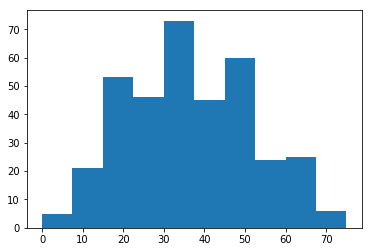

In [12]:
plt.hist(df.loc[:,'Age'])#chekcing distribution of data in Age column

In [13]:
df = df[df.loc[: , "Age"]  > 0]# keeping values greater than 0

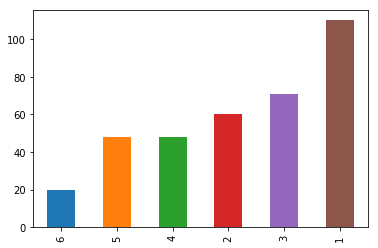

In [14]:
df['Diagnosis'].value_counts().sort_values().plot.bar()#checking distribution of target feature

### Decoding all the columns - data is ordinal except Age and 

In [15]:
for element in header:
    if (element != "Age")and (element != "History") and (element != "Diagnosis"):
        df.loc[df.loc[:, element]== 0, element] = "absent"
        df.loc[df.loc[:, element]== 1, element] = "Low"
        df.loc[df.loc[:, element]== 2, element] = "Medium"
        df.loc[df.loc[:, element]== 3, element] = "High"
    elif (element == "history"):
        dataset.loc[dataset.loc[:, element] == 0, element] = "NO"
        dataset.loc[dataset.loc[:, element] == 1, element] = "YES"
    elif (element == "Diagnosis"):
        df.loc[df.loc[:, element]== 1, element] = "diagnosis[0]"
        df.loc[df.loc[:, element]== 2, element] = "diagnosis[1]"
        df.loc[df.loc[:, element]== 3, element] = "diagnosis[2]"
        df.loc[df.loc[:, element]== 4, element] = "diagnosis[3]"
        df.loc[df.loc[:, element]== 5, element] = "diagnosis[4]"
        df.loc[df.loc[:, element]== 6, element] = "diagnosis[5]"
    else:
        pass

### Consolidating categories if possible

In [16]:
# checking the number of data in each category to determine possibility of consolidation
for element in header:
    if element != "Age":
        print(df.loc[:, element].value_counts())   

Medium    210
High       90
Low        53
absent      4
Name: erythema, dtype: int64
Medium    193
Low       104
High       52
absent      8
Name: scaling, dtype: int64
Medium    167
Low        89
absent     55
High       46
Name: borders, dtype: int64
absent    116
Medium     97
High       73
Low        71
Name: itching, dtype: int64
absent    218
Low        69
Medium     52
High       18
Name: koebner, dtype: int64
absent    289
Medium     41
High       26
Low         1
Name: polygonal papules, dtype: int64
absent    324
Medium     16
Low        11
High        6
Name: follicular papules, dtype: int64
absent    291
Medium     44
High       13
Low         9
Name: oral mucosal, dtype: int64
absent    245
Medium     63
Low        26
High       23
Name: knee and elbow, dtype: int64
absent    256
Medium     55
Low        30
High       16
Name: scalp, dtype: int64
absent    313
Low        44
Name: history, dtype: int64
absent    288
Medium     46
High       16
Low         7
Name: melanin in

In [17]:
df.loc[df.loc[:, "band-like"] == "Low", "band-like"] = "absent"
df.loc[df.loc[:, "perifollicular parakeratosis"] == "Low", "perifollicular parakeratosis"] = "Medium"  
df.loc[df.loc[:, "plug"] == "Medium", "plug"] = "Low"
df.loc[df.loc[:, "saw-tooth"] == "Low", "saw-tooth"] = "Medium"
df.loc[df.loc[:, "vacuolisation"] == "Low", "vacuolisation"] = "Medium"
df.loc[df.loc[:, "fibrosis"] == "Low", "fibrosis"] = "Medium"
df.loc[df.loc[:, "eosinophils"] == "Medium","eosinophils" ] = "Low"
df.loc[df.loc[:, "melanin incontinence"] == "Low", "melanin incontinence"] = "Medium"
df.loc[df.loc[:, "oral mucosal"] == "Low",  "oral mucosal"] = "Medium"
df.loc[df.loc[:, "polygonal papules"] == "Low", "polygonal papules"] = "absent"

### One-hot encoding for a categorical column 

In [18]:
for i in header:
    if (i != "Age") and (i != "Diagnosis") and (i != "history"):
        for element in df.loc[:, i].unique():
            df.loc[:, str(i) + str(element)] = (df.loc[:, i] == element).astype(int)

In [19]:
df.shape

(357, 152)

#### Remove obsolete columns

In [20]:
for i in header:
    if (i != "Age") and (i != "Diagnosis") and (i != "history"):
        df = df.drop(i, axis = 1)

In [21]:
df.shape

(357, 120)

In [22]:
# Encodes the categorical variables in diagnosis
labelencoder = LabelEncoder()
for i in header:
    if (i == "Diagnosis") or (i == "history"):
        df.loc[:, i] = labelencoder.fit_transform(df.loc[:, i])

In [23]:
# changes the index of outcome column
df = df.reindex(list([a for a in df.columns if a != 'Diagnosis'] + ['Diagnosis']), axis=1)


In [24]:
n = len(df.columns) # determines the number of columns in dataset
X = df.iloc[:, :(n-1)].values
Y = df.iloc[:, (n-1)].values


In [25]:
y = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5]) # binerize target column for calculating fpr, tpr and threshold
n_classes = y.shape[1]

In [26]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\mittala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Naive  bayes Classifier

In [28]:
classifier = OneVsRestClassifier(GaussianNB())# predict each class against the other       
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
probas = classifier.predict_proba(X_test)

### Accuracy Measures

Confusion matrix (GaussianNB) for class 0 vs other classes: 
 [[71  2]
 [ 0 35]]
GaussianNB | Probability Threshold for class 0 
 [2. 1. 0.]

Precision: 0.946

Recall: 1.0

F1 score: 0.972
Confusion matrix (GaussianNB) for class 1 vs other classes: 
 [[86  2]
 [ 6 14]]
GaussianNB | Probability Threshold for class 1 
 [2. 1. 0.]

Precision: 0.875

Recall: 0.7

F1 score: 0.778
Confusion matrix (GaussianNB) for class 2 vs other classes: 
 [[93  0]
 [ 2 13]]
GaussianNB | Probability Threshold for class 2 
 [1. 0.]

Precision: 1.0

Recall: 0.867

F1 score: 0.929
Confusion matrix (GaussianNB) for class 3 vs other classes: 
 [[88  6]
 [ 4 10]]
GaussianNB | Probability Threshold for class 3 
 [2. 1. 0.]

Precision: 0.625

Recall: 0.714

F1 score: 0.667
Confusion matrix (GaussianNB) for class 4 vs other classes: 
 [[89  0]
 [ 2 17]]
GaussianNB | Probability Threshold for class 4 
 [1. 0.]

Precision: 1.0

Recall: 0.895

F1 score: 0.944
Confusion matrix (GaussianNB) for class 5 vs other classes:

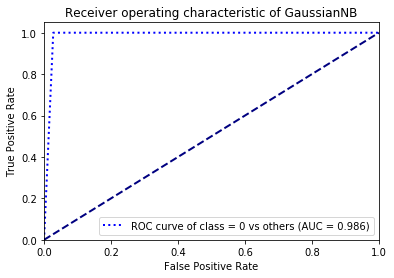

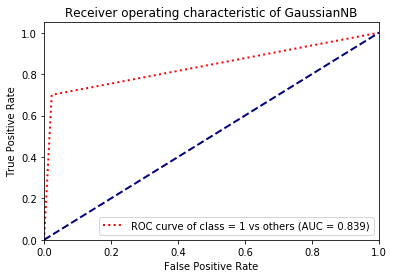

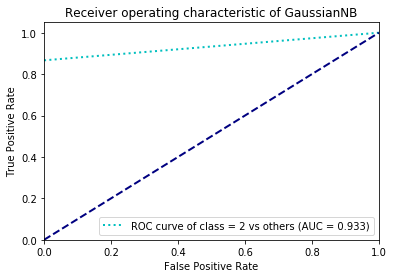

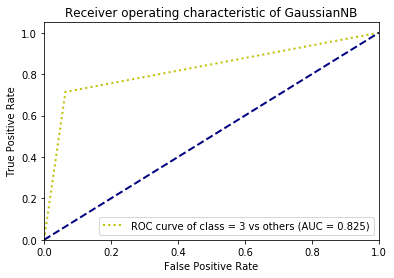

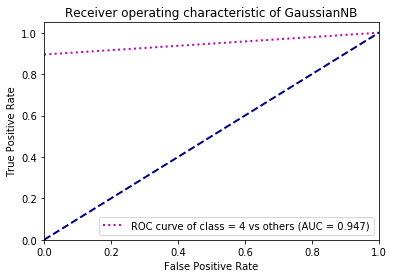

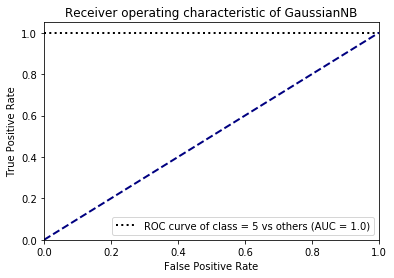

In [29]:

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
th = dict()
CM = dict()
P = dict()
R = dict ()
F1 = dict()
for i in range(n_classes):
    fpr[i], tpr[i], th [i] = roc_curve(y_test[:, i], probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    CM[i] = confusion_matrix (y_test[:, i], y_predict[:, i])
    print ('Confusion matrix (GaussianNB) for class', i, 'vs other classes: \n', CM[i])
    print ('GaussianNB | Probability Threshold for class', i, '\n', th[i])
    P[i] = precision_score(y_test[:, i], y_predict[:, i])
    print ("\nPrecision:", np.round(P[i], 3))
    R[i] = recall_score(y_test[:, i], y_predict[:, i])
    print ("\nRecall:", np.round(R[i], 3))
    F1[i] = f1_score(y_test[:, i], y_predict[:, i])
    print ("\nF1 score:", np.round(F1[i], 3))
plt.figure()
lw = 2 #line width
color = ['b', 'r', 'c', 'y', 'm', 'k']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color= color[i],\
             lw= lw, label='ROC curve of class = %s vs others (AUC = %s)' %(i, np.round(roc_auc[i], 3)), linestyle = ':')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of GaussianNB')
    plt.legend(loc="lower right")
    plt.show()